In [1]:
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.simplefilter("ignore")

In [2]:
df=pd.read_csv('file:///C:/Users/Md%20Asif%20Ikbal/Downloads/emma_tweets.csv')
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1436825934519209986,Bex Lynch,"Carlisle, England",girl. northern.,2010-10-20 19:10:14,117,426,1515,False,2021-09-11 22:56:12,18 year old female relegates the mega-hype aro...,"['ChristianoWho', 'EmmaRaducanu']",Twitter for Android,0,0,False
1,1436825880861478914,Rupinder K Gill,"England, United Kingdom","Here shining a light on NHS, womens rights, cl...",2012-05-07 10:28:26,2635,5001,13070,False,2021-09-11 22:55:59,She's done it! #EmmaRaducanu is #USOpen champi...,"['EmmaRaducanu', 'USOpen']",Twitter for Android,0,0,False
2,1436825829229666306,𝚕𝚊𝚞𝚛𝚎𝚗 ⋆,NaN,spend my life screaming at the tv when tennis ...,2011-04-20 17:57:55,1646,685,94663,False,2021-09-11 22:55:47,me for the foreseeable future.\n#EmmaRaducanu ...,"['EmmaRaducanu', 'USOpen']",Twitter for iPhone,0,0,False
3,1436825771624988676,Neeraj Nanaiah,"Mysore, India","Sports fan, Gooner.",2019-06-29 15:32:01,134,159,10035,False,2021-09-11 22:55:33,What a tennis story! Still can't wrap it aroun...,"['EmmaRaducanu', 'USOpen']",Twitter for Android,0,0,False
4,1436825431362179073,alastair mciver,"South East, England",Writer; Founder - GoWriteAhead website; featur...,2010-07-13 10:55:43,157,211,5397,False,2021-09-11 22:54:12,Rather overshadows the incredible doubles' dou...,NaN,Twitter for Android,0,0,False


In [3]:
df.shape

(10485, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10485 entries, 0 to 10484
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                10485 non-null  int64 
 1   user_name         10485 non-null  object
 2   user_location     8160 non-null   object
 3   user_description  9673 non-null   object
 4   user_created      10485 non-null  object
 5   user_followers    10485 non-null  int64 
 6   user_friends      10485 non-null  int64 
 7   user_favourites   10485 non-null  int64 
 8   user_verified     10485 non-null  bool  
 9   date              10485 non-null  object
 10  text              10485 non-null  object
 11  hashtags          7932 non-null   object
 12  source            10485 non-null  object
 13  retweets          10485 non-null  int64 
 14  favorites         10485 non-null  int64 
 15  is_retweet        10485 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 1.1+ MB


In [5]:
df.dtypes

id                   int64
user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
retweets             int64
favorites            int64
is_retweet            bool
dtype: object

In [6]:
df.isnull().sum()

id                     0
user_name              0
user_location       2325
user_description     812
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2553
source                 0
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [7]:
df=df.fillna(0)

In [8]:
df.describecribecribecribecribecribecribe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,1.048500e+04,1.048500e+04,10485.000000,10485.000000,10485.000000,10485.000000
mean,1.437008e+18,2.461390e+04,1558.986457,19597.299571,0.829089,8.461898
std,2.694559e+14,4.450253e+05,3496.741580,46436.496737,16.362225,144.849766
min,1.436820e+18,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.436825e+18,1.390000e+02,251.000000,975.000000,0.000000,0.000000
50%,1.436928e+18,5.270000e+02,691.000000,4198.000000,0.000000,1.000000
75%,1.437065e+18,1.692000e+03,1821.000000,16756.000000,0.000000,2.000000
max,1.438229e+18,1.390847e+07,126458.000000,871706.000000,1471.000000,12921.000000


In [9]:
df.describe().corr().T

,id,user_followers,user_friends,user_favourites,retweets,favorites
id,1.000000,0.198748,0.156726,0.189351,-0.631679,-0.268127
user_followers,0.198748,1.000000,0.996816,0.999688,-0.007650,0.736960
user_friends,0.156726,0.996816,1.000000,0.996648,0.070376,0.787477
user_favourites,0.189351,0.999688,0.996648,1.000000,-0.007568,0.736587
retweets,-0.631679,-0.007650,0.070376,-0.007568,1.000000,0.670112
favorites,-0.268127,0.736960,0.787477,0.736587,0.670112,1.000000


In [10]:
df.corr()

,id,user_followers,user_friends,user_favourites,user_verified,retweets,favorites,is_retweet
id,1.000000,0.048242,0.032200,0.033361,0.059995,0.006957,0.003804,NaN
user_followers,0.048242,1.000000,-0.001492,-0.016627,0.243623,0.047709,0.063273,NaN
user_friends,0.032200,-0.001492,1.000000,0.212318,0.040021,0.050731,0.035718,NaN
user_favourites,0.033361,-0.016627,0.212318,1.000000,-0.021322,0.024791,0.022705,NaN
user_verified,0.059995,0.243623,0.040021,-0.021322,1.000000,0.110564,0.150776,NaN
retweets,0.006957,0.047709,0.050731,0.024791,0.110564,1.000000,0.943843,NaN
favorites,0.003804,0.063273,0.035718,0.022705,0.150776,0.943843,1.000000,NaN
is_retweet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.isnull().sum()

id                  0
user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text                0
hashtags            0
source              0
retweets            0
favorites           0
is_retweet          0
dtype: int64

In [12]:
df.mean()

id                 1.437008e+18
user_followers     2.461390e+04
user_friends       1.558986e+03
user_favourites    1.959730e+04
user_verified      4.148784e-02
retweets           8.290892e-01
favorites          8.461898e+00
is_retweet         0.000000e+00
dtype: float64

In [13]:
df.min()

id                                               1436819898101948418
user_name                          " D-J-A-N-G-O. The D Is Silent. "
user_created                                     2006-11-02 05:02:44
user_followers                                                     0
user_friends                                                       0
user_favourites                                                    0
user_verified                                                  False
date                                             2021-09-11 22:32:13
text               " #EmmaRaducanu Just Attended Her First #MetGa...
source                                                    92 News HD
retweets                                                           0
favorites                                                          0
is_retweet                                                     False
dtype: object

In [14]:
df.max()

id                                               1438229023264546816
user_name                    🩺Nurse Amelia 🏴 #What's Your Emergency?
user_created                                     2021-09-15 02:01:07
user_followers                                              13908467
user_friends                                                  126458
user_favourites                                               871706
user_verified                                                   True
date                                             2021-09-15 19:51:34
text               🦓🦓🦓 obviously coming out as a #NUFC fan #EmmaR...
source                                             threadcreator.com
retweets                                                        1471
favorites                                                      12921
is_retweet                                                     False
dtype: object

In [21]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))


In [23]:
unique_values(df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,10485,10485,10485,10485,10485,10485,10485,10485,10485,10485,10485,10485,10485,10485,10485,10485
Uniques,10485,8197,3283,7679,8398,3336,3103,6595,2,8258,10474,2105,63,60,181,1


In [24]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [26]:
most_frequent_values(df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,10485,10485,10485,10485,10485,10485,10485,10485,10485,10485,10485,10485,10485,10485,10485,10485
Most frequent item,1436825934519209986,Safi Khan,0,0,2019-09-27 13:44:03,1289,3346,2316,False,2021-09-11 22:36:02,Congratulations #EmmaRaducanu,['EmmaRaducanu'],Twitter for iPhone,0,0,False
Frequence,1,221,2325,812,221,225,202,203,10050,11,7,3438,4284,8892,4864,10485
Percent from total,0.01,2.108,22.175,7.744,2.108,2.146,1.927,1.936,95.851,0.105,0.067,32.79,40.858,84.807,46.39,100.0


In [27]:
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show() 

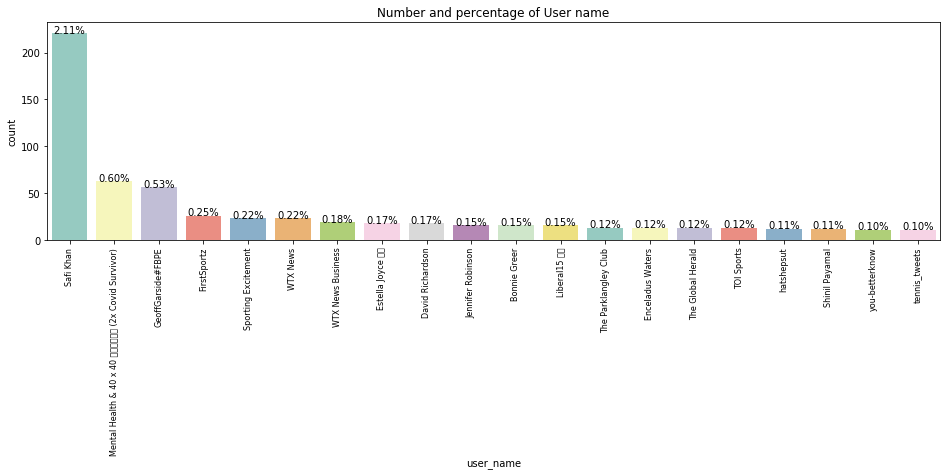

In [29]:
plot_count("user_name", "User name", df,4)

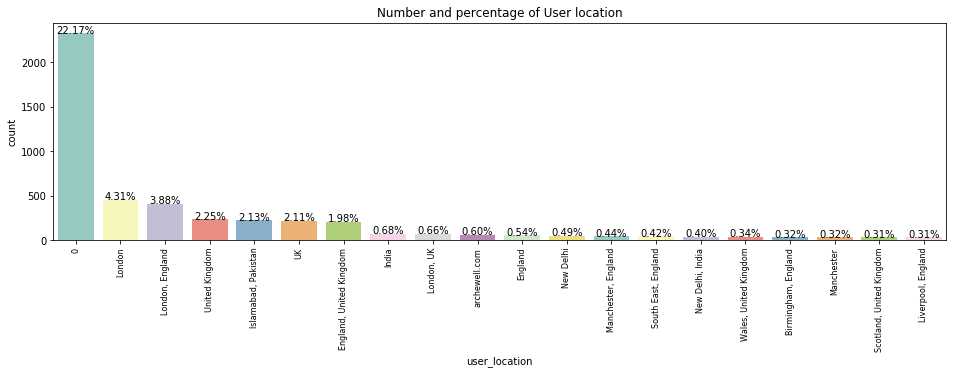

In [30]:
plot_count("user_location", "User location", df,4)

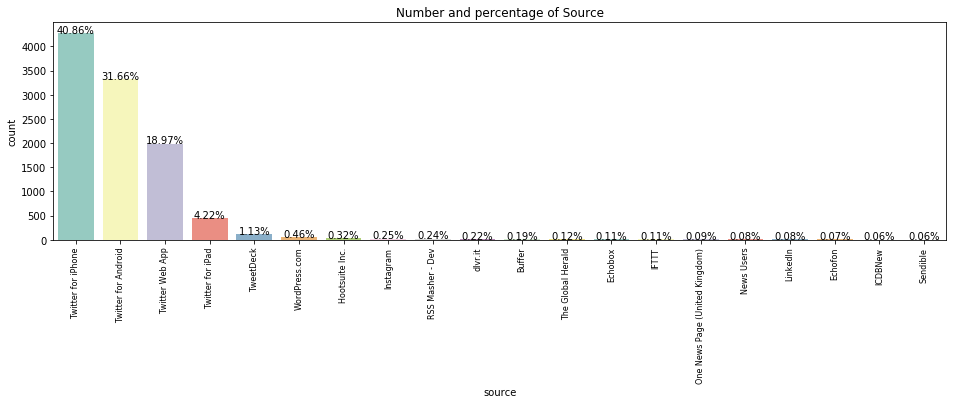

In [31]:
plot_count("source", "Source", df,4)

In [32]:
from wordcloud import WordCloud, STOPWORDS
def show_wordcloud(data, title="", mask=None, color="white"):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Emma", "EmmaRaducanu", "Raducanu", "USOpen", "USOpen2021", "US", "Open", "2021", "tenni"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask,background_color=color).generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=1.0)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

In [37]:
from wordcloud import WordCloud, STOPWORDS
def show_wordcloud(data, title="", mask=None, color="white"):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Emma", "EmmaRaducanu", "Raducanu", "USOpen", "USOpen2021", "US", "Open", "2021", "tenni"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask,background_color=color).generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=1.0)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

In [39]:
show_wordcloud(df['text'], title = 'Prevalent words in tweets', mask=mask)

NameError: name 'mask' is not defined